<a href="https://colab.research.google.com/github/MalayaRP/Drug-Discovery/blob/main/GCNN_MLM_Stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
##Get the MLM data
dataurl = "https://raw.githubusercontent.com/MalayaRP/Drug-Discovery/main/MLM_Data.txt"
df = pd.read_csv(dataurl, sep="\t")

In [3]:
df = df[["Smiles", "Stable"]]
df

,Smiles,Stable
0,Cc1c2[nH]ncc2cc(CC(c2ncc3n2CCN(Cc2ccccc2)C3)OC...,0
1,C[C@H](C[C@H]([C@@H](C(C)(C)O)OC(C)=O)O[C@@H]1...,0
2,Cc1c2[nH]ncc2cc(CC(c2ncc(C3)n2CCN3C2CCCCC2)OC(...,0
3,CC[C@H](CC[C@H]1C(N(CC2)CCN2C(C)=O)=O)N1C(C(S1...,0
4,Cc1c2[nH]ncc2cc(CC(c2nccn2Cc2cc(Cl)nc(C)c2)NC(...,0
...,...,...
566,CCOc(cc1)cc(O2)c1C=CC2=O,0
567,COc(cccc1)c1OCC(CO)O,1
568,CCCc1nc2ccccc2cc1,0
569,COc1cccc(N2O)c1NC2=O,1


In [4]:
df["Stable"].value_counts()

0    462
1    109
Name: Stable, dtype: int64

In [5]:
pip install dgl dglgo -f https://data.dgl.ai/wheels/repo.html

Looking in links: https://data.dgl.ai/wheels/repo.html
     |████████████████████████████████| 6.2 MB 5.0 MB/s 
     |████████████████████████████████| 77 kB 3.2 MB/s 
     |████████████████████████████████| 45 kB 2.3 MB/s 
     |████████████████████████████████| 51 kB 475 kB/s 
     |████████████████████████████████| 109 kB 11.2 MB/s 
     |████████████████████████████████| 596 kB 42.9 MB/s 
     |████████████████████████████████| 10.9 MB 39.3 MB/s 
     |████████████████████████████████| 103 kB 51.0 MB/s 
     |████████████████████████████████| 42 kB 786 kB/s 
     |████████████████████████████████| 3.1 MB 35.4 MB/s 
     |████████████████████████████████| 546 kB 37.0 MB/s 
     |████████████████████████████████| 121 kB 35.1 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 90 kB 8.4 MB/s 
     |████████████████████████████████| 100 kB 9.1 MB/s 
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 1.8.6
    Uninsta

In [6]:
!python --version

Python 3.7.13


In [7]:
!pip install rdkit-pypi

     |████████████████████████████████| 22.5 MB 2.1 MB/s 


In [8]:
from rdkit import Chem
import dgl
import numpy as np
from numpy import random
np.random.seed(1)

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [9]:
def smiles2graph(smiles_string):
  mol = Chem.MolFromSmiles(smiles_string)
  A = Chem.GetAdjacencyMatrix(mol)
  A = np.asmatrix(A)
  nz = np.nonzero(A)
  src, dst = nz[0], nz[1]
  g = dgl.graph((src,dst))
  return g

In [10]:
graph1 = smiles2graph("ON(c1cc(F)cc(F)c1N1)C1=O")

In [11]:
graph1

Graph(num_nodes=13, num_edges=28,
      ndata_schemes={}
      edata_schemes={})

In [12]:
!pip install networkx

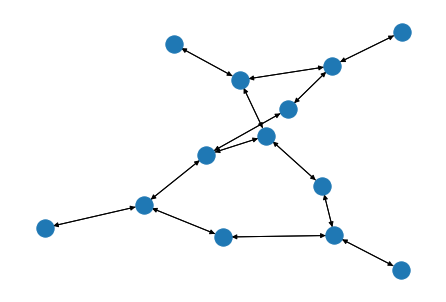

In [13]:
import networkx as nx
G = dgl.to_networkx(graph1)
nx.draw(G)

In [14]:
!pip install ogb

     |████████████████████████████████| 78 kB 3.6 MB/s 
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=b73069557c9773aa6226abc8a4e8e7e1c9edcf988a510943af1bdc4a7cf36455
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built littleutils


In [15]:
import ogb
from ogb import *
from ogb.utils.features import atom_to_feature_vector, bond_to_feature_vector

In [16]:
## generate atom features
def feat_vec(smiles_string):
  mol = Chem.MolFromSmiles(smiles_string)
  atom_features_list = []
  print(mol.GetAtoms())
  for atom in mol.GetAtoms():
    atom_features_list.append(atom_to_feature_vector(atom))
  x = np.array(atom_features_list, dtype=np.int64)
  return x


In [17]:
# from rdkit import Chem
# from rdkit.Chem.Draw import IPythonConsole

# def show_atom_number(mol, label):
#     for atom in mol.GetAtoms():
#         atom.SetProp(label, str(atom.GetIdx()+1))
#     return mol
# mol = Chem.MolFromSmiles('c1ccccc(C(N)=O)1')
# show_atom_number(mol, 'atomNote')

In [18]:
vec1 = feat_vec("ON(c1cc(F)cc(F)c1N1)C1=O")

In [19]:
vec1

array([[7, 0, 2, 5, 1, 0, 1, 0, 0],
       [6, 0, 3, 5, 0, 0, 1, 1, 1],
       [5, 0, 3, 5, 0, 0, 1, 1, 1],
       [5, 0, 3, 5, 1, 0, 1, 1, 1],
       [5, 0, 3, 5, 0, 0, 1, 1, 1],
       [8, 0, 1, 5, 0, 0, 2, 0, 0],
       [5, 0, 3, 5, 1, 0, 1, 1, 1],
       [5, 0, 3, 5, 0, 0, 1, 1, 1],
       [8, 0, 1, 5, 0, 0, 2, 0, 0],
       [5, 0, 3, 5, 0, 0, 1, 1, 1],
       [6, 0, 3, 5, 1, 0, 1, 1, 1],
       [5, 0, 3, 5, 0, 0, 1, 1, 1],
       [7, 0, 1, 5, 0, 0, 1, 0, 0]])

In [20]:
import torch

In [ ]:
## ignoring incorrect graphs

smiles_list = df["Smiles"].to_list()
# smiles_list
i = 0
graphs = []
exceptions = []
for smile in smiles_list:
  g_mol = smiles2graph(smile)
  try:
    g_mol.ndata["feat"] = torch.tensor(feat_vec(smile))
  except:
    exceptions.append(i)
  graphs.append(g_mol)
  i+=1

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [36]:
labels = df["Stable"].to_list()
labels = torch.tensor(labels)
labels.to(device)
# graphs.to(device)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,

In [23]:
class SyntheticDataset(dgl.data.DGLDataset):
  def __init__(self):
    super().__init__(name="synthetic")
  def process(self):
    self.graphs = graphs
    self.labels = torch.LongTensor(labels)
  def __getitem__(self,i):
    return self.graphs[i], self.labels[i]
  def __len__(self):
    return len(self.graphs)

dataset = SyntheticDataset()

In [24]:
from dgl.data.graph_serialize import GraphData
from dgl.dataloading import GraphDataLoader
from torch.utils.data.sampler import SubsetRandomSampler

num_examples = len(dataset)
num_train = int(num_examples * 0.8)

train_sampler = SubsetRandomSampler(torch.arange(num_train))
test_sampler = SubsetRandomSampler(torch.arange(num_train, num_examples))

train_dataloader = GraphDataLoader(dataset, sampler=train_sampler, batch_size=5, drop_last=False)
test_dataloader = GraphDataLoader(dataset, sampler=test_sampler, batch_size=5, drop_last=False)


In [25]:
dataset
from torch.nn import functional as F

In [26]:
from dgl.nn import GraphConv


class GCN(torch.nn.Module):
  def __init__(self, in_feats, h_feats, num_classes):
    super(GCN, self).__init__()
    self.conv1 = GraphConv(in_feats, h_feats)
    self.conv2 = GraphConv(h_feats, num_classes)
  
  def forward(self, g, in_feats):
    h = self.conv1(g, in_feats)
    h = F.relu(h)
    h = self.conv2(g, h)
    g.ndata['h'] = h
    return dgl.mean_nodes(g, 'h')

In [27]:
import tqdm
from tqdm import tqdm
import time
from time import sleep

In [30]:
torch.cuda.is_available()

True

In [39]:
## Train and Evaluate
batch_size=5
model = GCN(9,8,2)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

for epoch in range(20):
  with tqdm(train_dataloader, unit="batch") as tepoch:
      tepoch.set_description(f"Epoch {epoch}")
      for batched_graph, labels in train_dataloader:
        pred = model(batched_graph, batched_graph.ndata['feat'].float())
        # print(pred, labels)
        loss = F.cross_entropy(pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        predictions = labels.argmax(dim=-1, keepdim=True).squeeze()
        # loss = F.nll_loss(output, target)
        correct = (predictions == labels).sum().item()
        accuracy = correct / batch_size
        tepoch.set_postfix(loss=loss.item(), accuracy=100. * accuracy)
        sleep(0.1)
num_correct = 0
num_tests = 0

for batched_graph, labels in test_dataloader:
  pred = model(batched_graph, batched_graph.ndata['feat'].float())
  num_correct += (pred.argmax(1) == labels).sum().item()
  num_tests += len(labels)

print('Test accuracy:', num_correct / num_tests)

Epoch 19:   0%|          | 0/92 [00:09<?, ?batch/s, accuracy=20, loss=0.184]


Test accuracy: 0.8
